##### Copyright 2018 The TensorFlow Authors.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
# @title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Proj1A - Basic Regression: Understanding the ADNI Data Using Regression  

> ### **(30 points + 3 extra credit points) || Due by 9/14 11:59pm**





<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Instructions

Please make a copy and rename it with your name (ex: Proj1A_Ilmi_Yoon). All grading points should be explored in the notebook but some can be done in a separate pdf file. 

*Graded questions will be listed with "Q:" followed by the corresponding points.* 

You will be submitting **a pdf** file containing **the url of your own proj1A.**


---



>[Proj1A - Basic Regression: Understanding the ADNI Data Using Regression](#scrollTo=EIdT9iu_Z4Rb)

>>[1. Load in the Data](#scrollTo=gFh9ne3FZ-On)

>>[2. Clean the Data](#scrollTo=3MWuJTKEDM-f)

>>[3Inspect the Data](#scrollTo=J4ubs136WLNp)

>>[Select a Few Features to Work On and Split Features from Labels](#scrollTo=Db7Auq1yXUvh)

>>[Normalization](#scrollTo=mRklxK5s388r)

>>>[5.1 The Normalization Layer](#scrollTo=aFJ6ISropeoo)

>>[Linear regression](#scrollTo=6o3CrycBXA2s)

>>>[6.1. One Variable](#scrollTo=lFby9n0tnHkw)

>>>[6.2. Multiple Variables (Features)](#scrollTo=Yk2RmlqPoM9u)

>[Extra Credit: A DNN regression](#scrollTo=SmjdzxKzEu1-)

>>[Instructions](#scrollTo=DT_aHPsrzO1t)

>>[A. Train the Model](#scrollTo=ELz48lsgqC46)

>>>[A1. One Variable](#scrollTo=7T4RP1V36gVn)

>>>[A2. Full Model](#scrollTo=S_2Btebp2e64)

>>[B. Performance](#scrollTo=uiCucdPLfMkZ)

>>[C. Make Predictions](#scrollTo=ft603OzXuEZC)

>[Conclusion](#scrollTo=vgGQuV-yqYZH)



## Table of Contents

Introduction (Points: 30 points)
1. Load in the Data
2. Clean the Data
3. Inspect the Data
4. Select a Few Features to Work On and Split Features from Labels
5. Normalization

  5.1 The Normalization Layer

6. Linear Regression

  6.1 One Variable
 
  6.2 Multiple Variable (Features)

A DNN Regression (Extra Credit: 3 points)

1. Instructions
2. A. Train the Model 

  A1. One Variable 
  
  A2. Full Model

3. B. Performance
4. C. Make Predictions

Conclusion

---



## Introduction

In a **regression** problem, the aim is to *predict the output of a continuous value*, like a price or a probability.

Contrast this with a **classification** problem, where the aim is to *select a class from a list of classes* (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This example uses the `tf.keras API`, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [3]:
# Use seaborn for pairplot
!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

from IPython.display import display

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


### 1. Load in the Data
First download and import the dataset using pandas:

In [6]:
url = "https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/PatData.csv"
data = pd.read_csv(url)

In [7]:
dataset = data.copy()
dataset.tail()

,PTID,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,DX,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
1732,941_S_4377,69.3,Female,12,Not Hisp/Latino,White,Widowed,1.0,MCI,19850.0,6276.500000,854605.0,3098.750000,14773.000000,16232.75,1.307478e+06
1733,941_S_4420,81.4,Male,18,Not Hisp/Latino,White,Married,0.0,MCI,45450.5,7542.250000,1125837.5,4501.750000,16491.250000,17802.75,1.658722e+06
1734,941_S_4764,82.7,Female,20,Not Hisp/Latino,White,Never married,0.0,MCI,63228.5,6092.500000,915772.5,3933.666667,17667.333333,17832.00,1.483815e+06
1735,941_S_5124,76.7,Female,20,Not Hisp/Latino,White,Married,0.0,NL,NaN,4691.666667,NaN,NaN,NaN,NaN,1.489683e+06
1736,941_S_5193,72.5,Female,16,Not Hisp/Latino,White,Married,0.0,NL,22958.5,7009.500000,1026105.0,4007.500000,15812.500000,17461.00,1.465065e+06


In [8]:
dataset['DX'].value_counts()

MCI                586
Dementia           577
NL                 423
MCI to Dementia    108
NL to MCI           29
NL to Dementia       3
MCI to NL            3
Dementia to MCI      1
Name: DX, dtype: int64

So, I would like to take out everything in the dataset **EXCEPT** the following levels: NL, MCI and Dementia. 

*NL = cognitively normal , MCI = mild cognitive impairement.*

In [9]:
# Get Rows that do not have Column value in DX as "MCI", "NL", and "Dementia"
index_to_drop = dataset[(dataset['DX'] != "MCI") & (dataset['DX'] != "NL") & (dataset['DX'] != "Dementia")].index

# Show indices that you want to drop
print("Indices to drop")
display(index_to_drop)

# Drop indices in index_to_drop so that you will only have "MCI", "NL", and "Dementia"
dataset = dataset.drop(index_to_drop)

Indices to drop


Int64Index([  15,   20,   28,   29,   34,   47,   74,   84,  106,  133,
            ...
            1644, 1645, 1654, 1683, 1687, 1693, 1715, 1720, 1722, 1726],
           dtype='int64', length=151)

In [10]:
# Now we only have MCI (Mild), Dementia (Dementia) and NL (Normal)
dataset['DX'].value_counts()

MCI         586
Dementia    577
NL          423
Name: DX, dtype: int64

### 2. Clean the Data

The dataset contains a few unknown values. To see how many unknown values, use the following code:

In [11]:
dataset.isna().sum()

PTID            0
AGE             0
PTGENDER        0
PTEDUCAT        0
PTETHCAT        0
PTRACCAT        0
PTMARRY         0
APOE4           6
DX              0
Ventricles     20
Hippocampus    50
WholeBrain     12
Entorhinal     92
Fusiform       92
MidTemp        92
ICV             1
dtype: int64

Drop those rows to keep this initial tutorial simple.

<p style="color:red; font-size:20px;">Q: **(1 point)** What are other ways to process these rows instead of dropping? </p>

<p style="color:green; font-size:20px;">A: DataFrame.fillna() </p>


In [12]:
dataset = dataset.dropna()
dataset.isna().sum()

PTID           0
AGE            0
PTGENDER       0
PTEDUCAT       0
PTETHCAT       0
PTRACCAT       0
PTMARRY        0
APOE4          0
DX             0
Ventricles     0
Hippocampus    0
WholeBrain     0
Entorhinal     0
Fusiform       0
MidTemp        0
ICV            0
dtype: int64

Categorical Data needs to be properly handled using one-hot-encoding. 

<p style="color:red; font-size:20px;">Q: **(2 points)** Explain in 200 words what is one-hot-encoding and why it is necessary to handle categorical data.</p>

<p style="color:green; font-size:20px;">A: It's making vectors where each vector has the same amount of components/dimensions and where the value of each component is either 0 or 1. Typically, the amount of components/dimensions is based on the amount of categories and each component/dimension is a category. It is necessary to handle categorical  data because categorical data can be used to group data, so if you wanted to train a model using categorical data, you can potentially get a better result because a group of data might correlate to or be an indicator of something. For example, if you were balding and your relatives were also balding and that you and your relatives were part of a study and that study had genes as a feature, then it's possible that your family members are grouped by a gene that causes balding. </p>

<p style="color:red; font-size:20px;">Q: **(1 point)** Make one more categorical feature into one-hot-encoding </p>

<p style="color:green; font-size:20px;">A: Making the PTMARRY Category into a component in addition to the previous one_hot_data</p>



In [13]:
one_hot_data = pd.get_dummies(
    dataset, columns=['PTGENDER'], prefix='', prefix_sep='')

# Answer for adding one more category feature into the one-hot-encoding (pseudo one-hot-encoding)
one_hot_data = pd.get_dummies(
    one_hot_data, columns=['PTMARRY'], prefix='', prefix_sep='')

one_hot_data.tail()

,PTID,AGE,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,DX,Ventricles,Hippocampus,WholeBrain,...,Fusiform,MidTemp,ICV,Female,Male,Divorced,Married,Never married,Unknown,Widowed
1730,941_S_4365,80.3,20,Not Hisp/Latino,White,0.0,NL,55885.2,7350.80,1105758.0,...,19869.000000,20101.25,1656876.0,0,1,0,1,0,0,0
1732,941_S_4377,69.3,12,Not Hisp/Latino,White,1.0,MCI,19850.0,6276.50,854605.0,...,14773.000000,16232.75,1307477.5,1,0,0,0,0,0,1
1733,941_S_4420,81.4,18,Not Hisp/Latino,White,0.0,MCI,45450.5,7542.25,1125837.5,...,16491.250000,17802.75,1658722.5,0,1,0,1,0,0,0
1734,941_S_4764,82.7,20,Not Hisp/Latino,White,0.0,MCI,63228.5,6092.50,915772.5,...,17667.333333,17832.00,1483815.0,1,0,0,0,1,0,0
1736,941_S_5193,72.5,16,Not Hisp/Latino,White,0.0,NL,22958.5,7009.50,1026105.0,...,15812.500000,17461.00,1465065.0,1,0,0,1,0,0,0



<p style="color:red; font-size:20px;">Q: **(1 point)** Explain why DX column is mapped to numeric values as below.
</p>

<p style="color:green; font-size:20px;">A: In this particular case, we want a numerical representation of a category's value using integers because we are probably going to use an algorithm that only takes in numbers and not strings.</p>


In [14]:
cleanup_DX = {"DX": {"NL": 1, "MCI": 2, "Dementia": 3}}
one_hot_data = one_hot_data.replace(cleanup_DX)

In [15]:
one_hot_data.tail(10)

,PTID,AGE,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,DX,Ventricles,Hippocampus,WholeBrain,...,Fusiform,MidTemp,ICV,Female,Male,Divorced,Married,Never married,Unknown,Widowed
1724,941_S_4036,74.0,20,Not Hisp/Latino,White,0.0,2,9936.6,7916.20,1042420.0,...,22559.600000,18902.80,1445052.0,0,1,0,1,0,0,0
1725,941_S_4066,78.7,18,Not Hisp/Latino,White,0.0,1,54990.0,5900.00,894850.0,...,18757.000000,16903.00,1396030.0,1,0,0,1,0,0,0
1727,941_S_4187,62.0,16,Not Hisp/Latino,White,0.0,2,15189.0,8575.20,1287988.0,...,25651.400000,24870.60,1608678.0,0,1,0,1,0,0,0
1728,941_S_4255,72.4,16,Not Hisp/Latino,White,1.0,1,34095.8,6494.60,1068386.0,...,19417.000000,21324.00,1582688.0,0,1,0,0,1,0,0
1729,941_S_4292,70.9,15,Not Hisp/Latino,White,0.0,1,24753.4,7727.60,1035434.0,...,17155.200000,20151.60,1461196.0,0,1,0,1,0,0,0
1730,941_S_4365,80.3,20,Not Hisp/Latino,White,0.0,1,55885.2,7350.80,1105758.0,...,19869.000000,20101.25,1656876.0,0,1,0,1,0,0,0
1732,941_S_4377,69.3,12,Not Hisp/Latino,White,1.0,2,19850.0,6276.50,854605.0,...,14773.000000,16232.75,1307477.5,1,0,0,0,0,0,1
1733,941_S_4420,81.4,18,Not Hisp/Latino,White,0.0,2,45450.5,7542.25,1125837.5,...,16491.250000,17802.75,1658722.5,0,1,0,1,0,0,0
1734,941_S_4764,82.7,20,Not Hisp/Latino,White,0.0,2,63228.5,6092.50,915772.5,...,17667.333333,17832.00,1483815.0,1,0,0,0,1,0,0
1736,941_S_5193,72.5,16,Not Hisp/Latino,White,0.0,1,22958.5,7009.50,1026105.0,...,15812.500000,17461.00,1465065.0,1,0,0,1,0,0,0


In [16]:
train_dataset = one_hot_data.sample(frac=0.8, random_state=0)
test_dataset = one_hot_data.drop(train_dataset.index)

### 3. Inspect the Data

Have a quick look at the joint distribution of a few pairs of columns from the training set. *Can you find the data that show their relationship clearly?*


<p style="color:red; font-size:20px;">Q: **(2 points)** Please work with different columns and write what you have learned from the visualization of the data.
</p>

<p style="color:green; font-size:20px;">A: The diagonal subplots are essentially histograms that instead uses kernels rather than counting similar data points, the more you have of a particular data point, the more kernels you stack on one another. A kernel is the shape that is applied over a data point which is determined by a kernel function. All data points have the same kernel function. The diagonal subplots are also 1 dimensional KDE plots. The non diagonal subplots are 2 dimensional representations of a KDE plot. </p>

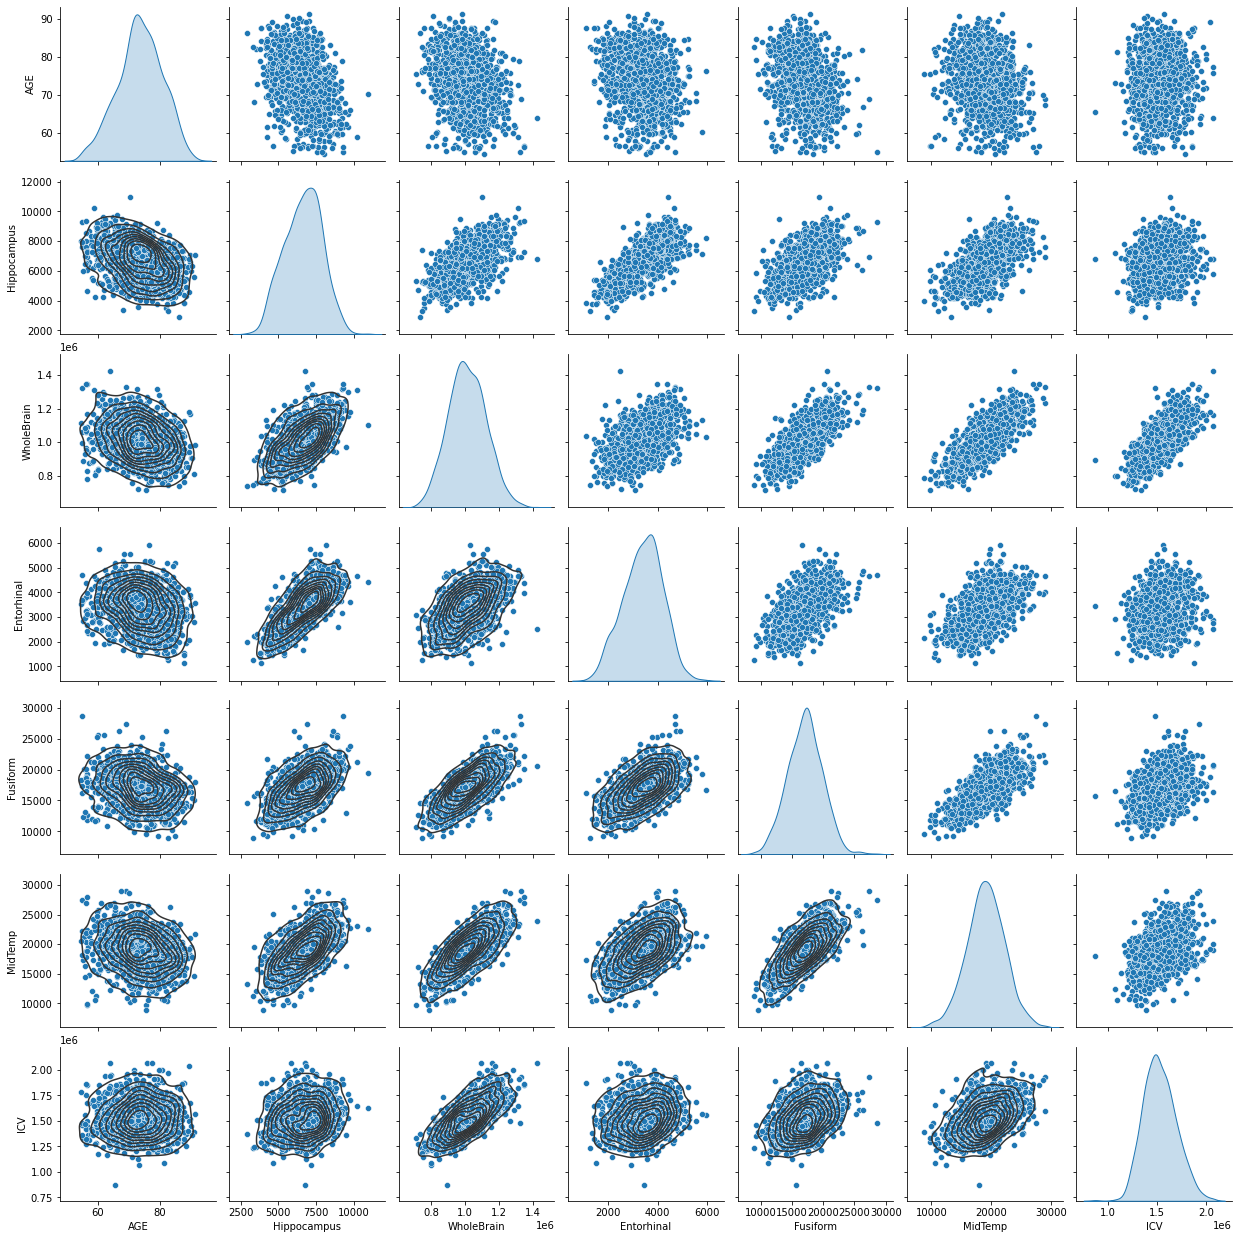

In [17]:
"""
Notes:
    KDE is the ghing that makes a histogram into a curve
    
    
Reference:
    What is kernel density estimation? And how to build a KDE plot in Python? | Seaborn KDEplot
        Notes:
            Explains what a KDE is
        Reference:
            https://www.youtube.com/watch?v=DCgPRaIDYXA&t=411s

"""
pairplot_train_dataset = sns.pairplot(
    train_dataset[["AGE",
                   # "PTEDUCAT",  # Not suitable data for correlations
                   # "DX",  # Not suitable data for correlations
                   "Hippocampus",
                   "WholeBrain",
                   "Entorhinal",
                   "Fusiform",
                   "MidTemp",
                   "ICV"
                   ]], diag_kind="kde")

# pairplot_train_dataset.fig.set_size_inches(10,10)

# Add the contour lines on the bottom half of the dataset
pairplot_train_dataset.map_lower(sns.kdeplot, levels=10, color=".2")

Also look at the overall statistics, note how each feature covers a very different range:

In [18]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1183.0,7.354328e+01,7.186444,54.400000,6.910000e+01,7.360000e+01,7.850000e+01,9.140000e+01
PTEDUCAT,1183.0,1.592899e+01,2.878245,4.000000,1.400000e+01,1.600000e+01,1.800000e+01,2.000000e+01
APOE4,1183.0,5.714286e-01,0.666908,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
DX,1183.0,2.091293e+00,0.790243,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Ventricles,1183.0,4.228182e+04,23852.178487,6069.500000,2.461721e+04,3.727520e+04,5.366138e+04,1.514055e+05
Hippocampus,1183.0,6.631566e+03,1237.390482,2894.500000,5.735750e+03,6.717167e+03,7.537117e+03,1.094188e+04
WholeBrain,1183.0,1.013104e+06,111468.502835,712985.400000,9.358254e+05,1.008554e+06,1.089934e+06,1.425556e+06
Entorhinal,1183.0,3.398071e+03,785.824008,1143.000000,2.874750e+03,3.443000e+03,3.945167e+03,5.931000e+03
Fusiform,1183.0,1.706231e+04,2772.266839,8863.666667,1.520095e+04,1.708750e+04,1.887675e+04,2.863750e+04
MidTemp,1183.0,1.904685e+04,3155.796565,8850.333333,1.705983e+04,1.905550e+04,2.118038e+04,2.902000e+04


The code below allows you to look into different groups of data -- normal patients, mild patients and dimential patients. 

<p style="color:red; font-size:20px;">Q: **(3 points)** Play with the total data and/or each group data and its regression on age, DX, and other columns 
</p>

<p style="color:green; font-size:20px;">A: Sure</p>

In [19]:
# Get all rows where the column title called DX has a value that is NOT 1
index_to_drop = train_dataset[(train_dataset['DX'] != 1)].index  

# Drop the df index_to_drop
train_dataset = train_dataset.drop(index_to_drop) 

# Rotate the the describe() df to read the data clearer
print("People DF Describe")
display(train_dataset.describe().transpose())
display(train_dataset)

# print("Training Dataset")
# display(train_dataset.sort_index())

People DF Describe


,count,mean,std,min,25%,50%,75%,max
AGE,320.0,7.370250e+01,5.535573,59.70,7.017500e+01,7.315000e+01,7.712500e+01,8.960000e+01
PTEDUCAT,320.0,1.644375e+01,2.672856,6.00,1.500000e+01,1.600000e+01,1.800000e+01,2.000000e+01
APOE4,320.0,2.781250e-01,0.462537,0.00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
DX,320.0,1.000000e+00,0.000000,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Ventricles,320.0,3.315768e+04,17108.432145,7296.00,2.088250e+04,3.012520e+04,4.195965e+04,1.183093e+05
Hippocampus,320.0,7.396946e+03,893.617120,5004.20,6.789125e+03,7.402750e+03,7.968625e+03,1.094188e+04
WholeBrain,320.0,1.028703e+06,100214.930766,746249.00,9.619510e+05,1.027795e+06,1.093710e+06,1.318260e+06
Entorhinal,320.0,3.825325e+03,584.601182,2266.25,3.433100e+03,3.812000e+03,4.180767e+03,5.931000e+03
Fusiform,320.0,1.790285e+04,2316.413292,11512.80,1.635162e+04,1.779383e+04,1.944112e+04,2.629933e+04
MidTemp,320.0,2.018060e+04,2619.002084,12397.00,1.842235e+04,2.005933e+04,2.173790e+04,2.867360e+04


,PTID,AGE,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,DX,Ventricles,Hippocampus,WholeBrain,...,Fusiform,MidTemp,ICV,Female,Male,Divorced,Married,Never married,Unknown,Widowed
1241,100_S_1286,75.5,19,Not Hisp/Latino,White,0.0,1,50622.166667,8380.833333,1.078902e+06,...,15249.833333,21958.833333,1.738638e+06,1,0,1,0,0,0,0
670,032_S_4348,66.1,17,Not Hisp/Latino,White,2.0,1,17713.000000,7115.500000,9.065760e+05,...,13940.500000,16978.000000,1.291000e+06,1,0,1,0,0,0,0
421,021_S_4254,85.9,12,Not Hisp/Latino,White,0.0,1,33643.333333,5760.000000,8.691884e+05,...,16034.333333,16486.333333,1.294773e+06,1,0,0,0,0,0,1
1063,073_S_0312,82.8,20,Not Hisp/Latino,White,1.0,1,53251.666667,7198.666667,1.040647e+06,...,17931.000000,21635.666667,1.711420e+06,0,1,0,1,0,0,0
1293,116_S_0382,75.5,20,Not Hisp/Latino,White,0.0,1,29972.500000,7087.875000,9.589768e+05,...,17779.250000,19334.625000,1.544691e+06,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,099_S_0352,77.0,14,Not Hisp/Latino,White,0.0,1,41493.250000,5223.500000,7.668676e+05,...,14922.000000,15290.666667,1.255754e+06,1,0,0,1,0,0,0
773,036_S_5271,80.4,20,Not Hisp/Latino,White,0.0,1,54314.000000,7895.000000,1.239310e+06,...,23273.000000,23540.000000,1.775380e+06,0,1,0,1,0,0,0
677,032_S_5289,59.7,16,Not Hisp/Latino,White,1.0,1,36658.500000,7842.000000,1.055365e+06,...,16989.000000,24700.500000,1.542355e+06,1,0,0,1,0,0,0
766,036_S_4878,72.9,14,Not Hisp/Latino,Black,0.0,1,21944.666667,7302.000000,8.977874e+05,...,19189.800000,17637.800000,1.277356e+06,1,0,0,1,0,0,0


In [20]:
print("People DF")
pd_people_stuff = pd.DataFrame(train_dataset, columns=[
                               "Female", "Male", "Divorced", "Married", "Never married", "Unknown", "Widowed"])
display(pd_people_stuff)

People DF


,Female,Male,Divorced,Married,Never married,Unknown,Widowed
1241,1,0,1,0,0,0,0
670,1,0,1,0,0,0,0
421,1,0,0,0,0,0,1
1063,0,1,0,1,0,0,0
1293,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1197,1,0,0,1,0,0,0
773,0,1,0,1,0,0,0
677,1,0,0,1,0,0,0
766,1,0,0,1,0,0,0


In [21]:
print("People DF Sum of all Rows")
pd_peole_stuff_sum = pd_people_stuff.sum(axis=0)
display(pd_peole_stuff_sum)

People DF Sum of all Rows


Female           174
Male             146
Divorced          34
Married          216
Never married     21
Unknown            1
Widowed           48
dtype: int64

People DF Bar Graph by Sum of all Rows


<AxesSubplot:>

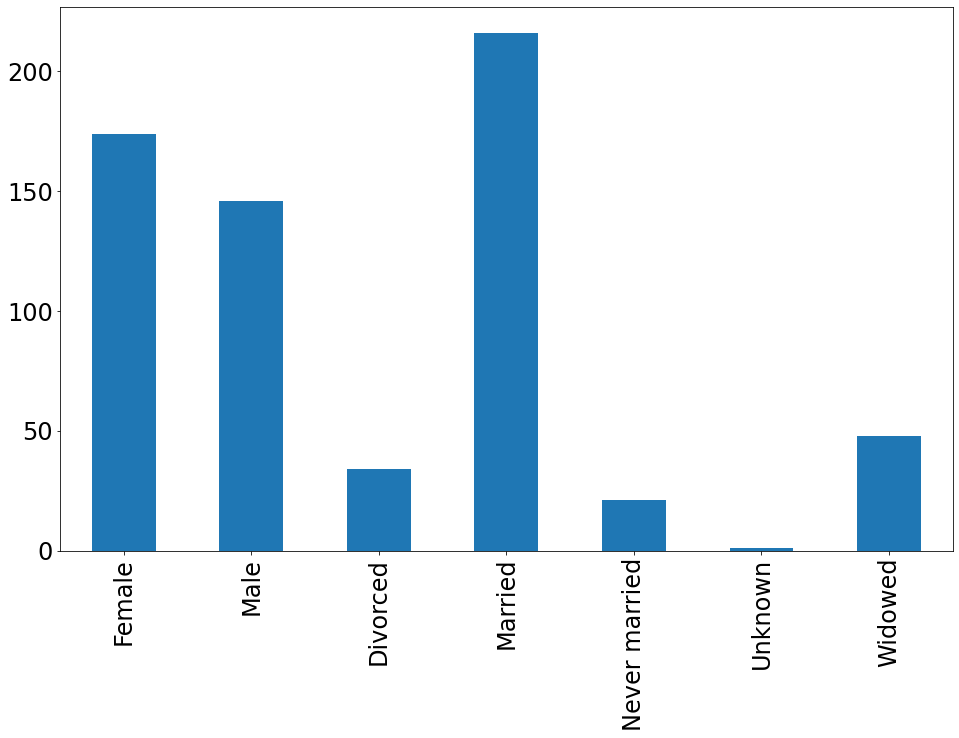

In [22]:
print("People DF Bar Graph by Sum of all Rows")
display(pd_peole_stuff_sum.plot.bar(figsize=(16, 10), fontsize=24))

In [23]:
print('People DF by "Married" category')
display(pd_people_stuff.sort_values(by=["Married"], ascending=False))

People DF by "Married" category


,Female,Male,Divorced,Married,Never married,Unknown,Widowed
1102,0,1,0,1,0,0,0
1629,0,1,0,1,0,0,0
16,1,0,0,1,0,0,0
117,1,0,0,1,0,0,0
987,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...
1093,0,1,0,0,1,0,0
1084,1,0,1,0,0,0,0
1124,0,1,1,0,0,0,0
1584,1,0,0,0,0,0,1


AGE by WholeBrain


<AxesSubplot:xlabel='AGE', ylabel='[WholeBrain]'>

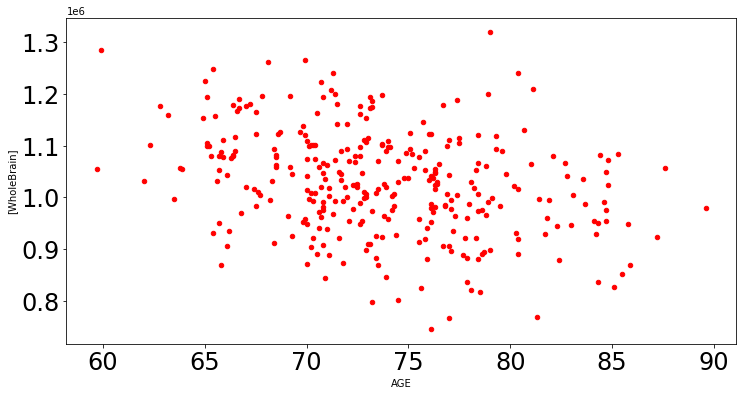

In [24]:
# "Hippocampus", "WholeBrain", "Entorhinal", "Fusiform", "MidTemp", "ICV"

# df_train_dataset_plot = train_dataset.plot.scatter(x="AGE", y =["Hippocampus"],color="r", figsize=(16,10), fontsize=24)
# train_dataset.plot.scatter(x="AGE", y =["MidTemp"],color="b", figsize=(16,10), fontsize=24, ax=df_train_dataset_plot)
# train_dataset.plot.scatter(x="AGE", y =["Fusiform"], color="g",figsize=(16,10), fontsize=24, ax=df_train_dataset_plot)
# train_dataset.plot.scatter(x="AGE", y =["Ventricles"],color="y", figsize=(16,10), fontsize=24, ax=df_train_dataset_plot)

print("AGE by WholeBrain")
display(train_dataset.plot.scatter(
    x="AGE", y=["WholeBrain"], color="r", figsize=(12, 6), fontsize=24))

### 4. Select a Few Features to Work On and Split Features from Labels

Separate the target value (the "label") from the features. **This label is the value that you will train the model to predict.**

In [25]:
# Important for below questions
TRAIN_FEATURES = train_dataset[[
    "Ventricles",
    "Hippocampus",
    "WholeBrain",
    "Entorhinal",
    "Fusiform",
    "MidTemp",
    "ICV"
]]
TEST_FEATURES = test_dataset[[
    "Ventricles",
    "Hippocampus",
    "WholeBrain",
    "Entorhinal",
    "Fusiform",
    "MidTemp",
    "ICV"
]]

# Important for below questions
TRAIN_LABELS = train_dataset[[
    "AGE",
#     "PTEDUCAT",  # Not suitable data for correlations
    "DX",  # Not suitable data for correlations
    "WholeBrain",
    "Hippocampus",
]]
TEST_LABELS = test_dataset[[
    "AGE",
#     "PTEDUCAT",  # Not suitable data for correlations
    "DX",  # Not suitable data for correlations
    "WholeBrain",
    "Hippocampus",
]]

## 5. Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.


<p style="color:red; font-size:20px;">Q: **(2 points)** Write in 100 words why normalization is important.
</p>

<p style="color:green; font-size:20px;">A: Normalization scales values within a dataset to be within a common range among the other values within the dataset. For example, lets say we have features of a an object that has different ranges, One of the features has a range from 0 to 10000 and another feature has its range from 0 to 1. If we use a machine learning model or linear regression model that incorporates both of those features, the feature with a larger range has more influence on the outcome compared to the smaller range.</p>

*Note*: There is no advantage to normalizing the one-hot features, it is done here for simplicity. For more details on how to use the preprocessing layers, refer the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers) tutorial.

In [26]:
TRAIN_FEATURES.describe().transpose()[['mean', 'std']]

,mean,std
Ventricles,3.315768e+04,17108.432145
Hippocampus,7.396946e+03,893.617120
WholeBrain,1.028703e+06,100214.930766
Entorhinal,3.825325e+03,584.601182
Fusiform,1.790285e+04,2316.413292
MidTemp,2.018060e+04,2619.002084
ICV,1.497202e+06,150201.143850


### 5.1 The Normalization Layer
The `preprocessing.Normalization` layer is a clean and simple way to build that preprocessing into your model.

The first step is to create the layer:

In [27]:
normalizer_features = preprocessing.Normalization(axis=-1)

Then `.adapt()` it to the data:

In [28]:
np_array_normalizer_features = np.array(TRAIN_FEATURES)
normalizer_features.adapt(np_array_normalizer_features)

The following code calculates the mean and variance, and stores them in the layer. 

In [29]:
print(normalizer_features.mean.numpy())

[[  33157.684    7396.946 1028702.5      3825.325   17902.846   20180.598
  1497201.9  ]]


When the layer is called, it returns the input data with each feature independently normalized:

In [30]:
first = np.array(TRAIN_FEATURES[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer_features(first).numpy())

First example: [[  50622.17    8380.83 1078901.67    4630.5    15249.83   21958.83
  1738638.33]]

Normalized: [[ 1.02  1.1   0.5   1.38 -1.15  0.68  1.61]]


## 6. Linear regression

Before building a DNN model, start with a linear regression.

### 6.1. One Variable

Start with a single-variable linear regression, to predict `AGE` from `hippocampus`.

<p style="color:red; font-size:20px;">Q: **(5 points)** Please pick different variable or labels to explore the relationship of the features. 
</p>

<p style="color:green; font-size:20px;">A: Ok i'll do all the TRAIN_FEATURES and TEST_LABELS</p>

Try and show at least 3 different variations.
Training a model with `tf.keras` typically starts by defining the model architecture.

In this case use a `keras.Sequential` model. This model represents a sequence of steps. In this case there are two steps:

* Normalize the input `hippocampus`.
* Apply a linear transformation ($y = mx+b$) to produce 1 output using `layers.Dense`.

The number of _inputs_ can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First create the hippocampus `Normalization` layer:

In [31]:
# hippocampus = np.array(TRAIN_FEATURES['Hippocampus'])

# hippocampus_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)  # 1 Input
# hippocampus_normalizer.adapt(hippocampus)

class DataContainer():
    def __init__(self):
        pass


list_data_container = []

AMOUNT_OF_MODEL_VERSION = 3

for model_version in range(AMOUNT_OF_MODEL_VERSION):

    for label_name in TRAIN_LABELS:

        for feature_name in TRAIN_FEATURES:

            data_container = DataContainer()
            data_container.model_version = model_version
            
            data_container.label_name = label_name

            data_container.feature_name = feature_name

            np_array_feature = np.array(TRAIN_FEATURES[feature_name])

            data_container.np_array_feature = np_array_feature

            feature_normalizer = preprocessing.Normalization(
                input_shape=[1, ], axis=None)  # 1 Input

            feature_normalizer.adapt(np_array_feature)

            data_container.feature_normalizer = feature_normalizer

            list_data_container.append(data_container)

Build the sequential model:

In [32]:
# V1
# hippocampus_model = tf.keras.Sequential([
#     hippocampus_normalizer,
#     layers.Dense(units=1)
# ])

# V2
# hippocampus_model = tf.keras.Sequential()
# hippocampus_model.add(hippocampus_normalizer)
# hippocampus_model.add(layers.Dense(units=1))

# hippocampus_model.summary()


for index, data_container in enumerate(list_data_container):

    feature_model = tf.keras.Sequential()

    feature_model._name = f"F_{data_container.feature_name}_L_{data_container.label_name}_Model_Version_{data_container.model_version}"

    feature_model.add(data_container.feature_normalizer)
    
#     if data_container.model_version == 0:
#         feature_model.add(layers.Dense(2, activation="relu")) # Additional layer

    if data_container.model_version == 0:
        feature_model.add(layers.Dense(64, activation='relu'))  # Additional layer
        feature_model.add(layers.Dense(64, activation='relu'))  # Additional layer
        
    elif data_container.model_version == 1:
        feature_model.add(layers.Dense(16, activation="selu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="selu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="selu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="selu"))  # Additional layer
        
    elif data_container.model_version == 2:
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer
        feature_model.add(layers.Dense(16, activation="relu"))  # Additional layer    
        
#     feature_model.add(layers.Dense(units=1))  # idk
#     feature_model.add(layers.Dense(1, activation="sigmoid"))
    feature_model.add(layers.Dense(1))
    
    data_container.feature_model = feature_model

    print(feature_model.summary())
    print()

Model: "F_Ventricles_L_AGE_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
None

Model: "F_Hippocampus_L_AGE_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)       

Model: "F_Entorhinal_L_WholeBrain_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_18 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
None

Model: "F_Fusiform_L_WholeBrain_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_19 (Normalizat (None

Model: "F_MidTemp_L_Hippocampus_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_27 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_78 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
None

Model: "F_ICV_L_Hippocampus_Model_Version_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_28 (Normalizat (None, 1)  

Total params: 868
Trainable params: 865
Non-trainable params: 3
_________________________________________________________________
None

Model: "F_Entorhinal_L_DX_Model_Version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_39 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_134 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_135 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_136 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_137 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_138 (Dense)            

Model: "F_Ventricles_L_Hippocampus_Model_Version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_50 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_189 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_190 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_191 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_192 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 17        
Total params: 868
Trainable params: 865
Non-trainable params: 3
__________________________

Model: "F_Entorhinal_L_AGE_Model_Version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_60 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_251 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_252 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_253 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_254 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_255 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_256 (Dense)            (No

Model: "F_Hippocampus_L_DX_Model_Version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_65 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_296 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_297 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_298 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_299 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_300 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_301 (Dense)            (No

_________________________________________________________________
dense_359 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_360 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_361 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_362 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_363 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_364 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_365 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_366 

Model: "F_Hippocampus_L_Hippocampus_Model_Version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_79 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_422 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_423 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_424 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_425 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_426 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_427 (Dense)      

This model will predict `AGE` from `hippocampus`.

Run the untrained model on the first 10 horse-power values. The output won't be good, but you'll see that it has the expected shape, `(10,1)`:

In [33]:
# hippocampus_model.predict(hippocampus[:10])

for data_container in list_data_container:
    print(f"Feature for {data_container.label_name} by {data_container.feature_name} (Model Version:{data_container.model_version})")
    print(data_container.feature_model.predict(np_array_feature[:10]))
    print()

Feature for AGE by Ventricles (Model Version:0)
[[-5.786]
 [-4.267]
 [-4.28 ]
 [-5.694]
 [-5.128]
 [-4.968]
 [-5.457]
 [-5.397]
 [-3.527]
 [-4.479]]

Feature for AGE by Hippocampus (Model Version:0)
[[235.747]
 [174.791]
 [175.305]
 [232.041]
 [209.337]
 [202.913]
 [222.556]
 [220.123]
 [145.066]
 [183.279]]

Feature for AGE by WholeBrain (Model Version:0)
[[1.447]
 [0.535]
 [0.542]
 [1.392]
 [1.052]
 [0.956]
 [1.25 ]
 [1.213]
 [0.09 ]
 [0.662]]

Feature for AGE by Entorhinal (Model Version:0)
[[-305.951]
 [-227.006]
 [-227.671]
 [-301.151]
 [-271.747]
 [-263.426]
 [-288.867]
 [-285.716]
 [-188.507]
 [-237.999]]

Feature for AGE by Fusiform (Model Version:0)
[[-180.339]
 [-133.425]
 [-133.82 ]
 [-177.486]
 [-160.012]
 [-155.068]
 [-170.186]
 [-168.314]
 [-110.547]
 [-139.957]]

Feature for AGE by MidTemp (Model Version:0)
[[-4.88 ]
 [-3.609]
 [-3.62 ]
 [-4.803]
 [-4.329]
 [-4.195]
 [-4.605]
 [-4.554]
 [-2.989]
 [-3.786]]

Feature for AGE by ICV (Model Version:0)
[[-0.119]
 [-0.113]
 [-

[[-1.749]
 [-0.631]
 [-0.646]
 [-1.71 ]
 [-1.411]
 [-1.3  ]
 [-1.598]
 [-1.567]
 [ 0.203]
 [-0.871]]

Feature for WholeBrain by Entorhinal (Model Version:1)
[[-157.099]
 [-115.461]
 [-115.812]
 [-154.567]
 [-139.059]
 [-134.67 ]
 [-148.088]
 [-146.426]
 [ -95.156]
 [-121.259]]

Feature for WholeBrain by Fusiform (Model Version:1)
[[55.256]
 [41.561]
 [41.677]
 [54.426]
 [49.336]
 [47.893]
 [52.301]
 [51.756]
 [34.836]
 [43.475]]

Feature for WholeBrain by MidTemp (Model Version:1)
[[7.993]
 [6.228]
 [6.243]
 [7.888]
 [7.247]
 [7.065]
 [7.62 ]
 [7.551]
 [5.357]
 [6.484]]

Feature for WholeBrain by ICV (Model Version:1)
[[ 0.06 ]
 [ 0.408]
 [ 0.406]
 [ 0.073]
 [ 0.014]
 [-0.   ]
 [ 0.078]
 [ 0.072]
 [ 0.362]
 [ 0.36 ]]

Feature for Hippocampus by Ventricles (Model Version:1)
[[2.743]
 [1.741]
 [1.75 ]
 [2.68 ]
 [2.302]
 [2.196]
 [2.522]
 [2.481]
 [1.279]
 [1.877]]

Feature for Hippocampus by Hippocampus (Model Version:1)
[[-377.391]
 [-279.426]
 [-280.252]
 [-371.434]
 [-334.946]
 [-324.

Once the model is built, configure the training procedure using the `Model.compile()` method. The most important arguments to compile are the `loss` and the `optimizer` since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizers.Adam`).

In [34]:
# hippocampus_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')

for data_container in list_data_container:
    data_container.feature_model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        loss='mean_absolute_error')

Once the training is configured, use `Model.fit()` to execute the training:

<p style="color:red; font-size:20px;">Q: **(5 points)** Explore different hyperparameters such as learning rate, epochs, batch sizes. Please document your explorations and reflections.
</p>
<p style="color:green; font-size:20px;">A: <br>epochs: 50, <br> learning rate: 0.01,<br> batch sizes: Default because that's what the documentation says "Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches)"<br>
Hidden Layers/Nodes: (There are a lot of different versions I made).<br><br>
Adding more dense layers made the prediction graph's lines more curvy.<br><br>
For the loss graphs, too many epochs probably isn't necessary for models with a lot of layers because the loss drops really fast.<br><br>
In the documentation it says not to change the batch_size for a sequential model.<br><br>
Based on the prediction graphs, the more epochs you have the less hidden layers/nodes you need.<br><br>
In the prediction graphs, if there is no correlation within the data, then you will get a bad curve/line that can't predict anything... (I removed them because they were a waste to calculate)<br><br> Too many neurons in a hidden layer leads to overfitting and too little leads to underfitting.                                                                                                                           
</p>

In [ ]:
%%time
# history = hippocampus_model.fit(
#     TRAIN_FEATURES['Hippocampus'], TRAIN_LABELS,
#     epochs=100,
#     # suppress logging
#     verbose=1,
#     # Calculate validation results on 20% of the training data
#     validation_split=0.2)


"""

Notes:
    type(feature_model) == tensorflow.python.keras.engine.sequential.Sequential

"""
for data_container in list_data_container:
    # Fitting is here
#     print(type(data_container.feature_model))

    history = data_container.feature_model.fit(
        x=TRAIN_FEATURES[data_container.feature_name],
        y=TRAIN_LABELS[data_container.label_name],
        epochs=50,  # 50 epochs instead of 100
        verbose=0,  # 1 to print, 0 to not print # suppress logging
        validation_split=0.2,  # Calculate validation results on 20% of the training data
#         batch_size=None
    )
    
    print(f"Fitting: {data_container.label_name} by {data_container.feature_name} (Model Version:{data_container.model_version})")
    data_container.history = history


Fitting: AGE by Ventricles (Model Version:0)
Fitting: AGE by Hippocampus (Model Version:0)
Fitting: AGE by WholeBrain (Model Version:0)
Fitting: AGE by Entorhinal (Model Version:0)
Fitting: AGE by Fusiform (Model Version:0)
Fitting: AGE by MidTemp (Model Version:0)
Fitting: AGE by ICV (Model Version:0)
Fitting: DX by Ventricles (Model Version:0)
Fitting: DX by Hippocampus (Model Version:0)
Fitting: DX by WholeBrain (Model Version:0)
Fitting: DX by Entorhinal (Model Version:0)
Fitting: DX by Fusiform (Model Version:0)
Fitting: DX by MidTemp (Model Version:0)
Fitting: DX by ICV (Model Version:0)
Fitting: WholeBrain by Ventricles (Model Version:0)
Fitting: WholeBrain by Hippocampus (Model Version:0)
Fitting: WholeBrain by WholeBrain (Model Version:0)
Fitting: WholeBrain by Entorhinal (Model Version:0)
Fitting: WholeBrain by Fusiform (Model Version:0)
Fitting: WholeBrain by MidTemp (Model Version:0)
Fitting: WholeBrain by ICV (Model Version:0)
Fitting: Hippocampus by Ventricles (Model Vers

Visualize the model's training progress using the stats stored in the `history` object.

In [ ]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

for data_container in list_data_container:
    hist = pd.DataFrame(data_container.history.history)
    hist['epoch'] = data_container.history.epoch

    print(f"{data_container.label_name} by {data_container.feature_name} (Model Version:{data_container.model_version})")
    display(hist.tail())

In [ ]:
def plot_loss(history, index, feature_name):
    plt.figure(index,figsize=(8, 8))
    plt.title(f"{feature_name} loss")
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 100])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [ ]:

for index, data_container in enumerate(list_data_container):
    plot_loss(data_container.history, 
              index, 
              f"{data_container.label_name} by {data_container.feature_name} (Model Version:{data_container.model_version})")

Collect the results on the test set, for later:

In [ ]:
test_results = {}

# test_results['hippocampus_model'] = hippocampus_model.evaluate(
#     TEST_FEATURES['Hippocampus'],
#     TEST_LABELS, verbose=0)

for data_container in list_data_container:
    test_results[data_container.feature_model.name] = data_container.feature_model.evaluate(
        TEST_FEATURES[data_container.feature_name],
        TEST_LABELS[data_container.label_name], 
        verbose=0)

# pprint(test_results)

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:


<p style="color:red; font-size:20px;">Q: **(1 point)** Replace the hard-coded constants with the min & max of this variable to work with other variables without changing it.
</p>
<p style="color:green; font-size:20px;">A: tf.linspace(np.amin(np_array_feature), np.amax(np_array_feature), np_array_feature.size)</p>

In [ ]:
for data_container in list_data_container:
    #     x = tf.linspace(3000, 11000, 100)
    x = tf.linspace(
        np.amin(data_container.np_array_feature),
        np.amax(data_container.np_array_feature),
        data_container.np_array_feature.size)

    y = data_container.feature_model.predict(x)

    data_container.x = x
    data_container.y = y


<p style="color:red; font-size:20px;">Q: **(1 point)** The name of feature 'Hippocampus' and the label 'age' should be replaced as variables, so exploring different variables will be easy without making changes every time. 
</p>
<p style="color:green; font-size:20px;">A: I did all the TRAIN_FEATURES and TRAIN_LABELS</p>

In [ ]:
def plot_feature(x, y, feature_name_1, feature_name_2, index, text_addition=""):
    plt.figure(index, figsize=(12, 12))
    plt.title(f"{feature_name_2} vs {feature_name_1} {text_addition}")
    plt.scatter(TRAIN_FEATURES[feature_name_1], TRAIN_LABELS[feature_name_2], label='Data')
    plt.xlabel(feature_name_1)
    plt.ylabel(feature_name_2)
    plt.legend()
    plt.plot(x, y, color='k', label='Predictions')


In [ ]:
for index, data_container in enumerate(list_data_container):
    plot_feature(data_container.x,
                 data_container.y,
                 data_container.feature_name,
                 data_container.label_name,
                 index,
                 f"(Model Version: {data_container.model_version})"
                 )

### 6.2. Multiple Variables (Features)

You can use an almost identical setup to make predictions based on multiple inputs. This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

This time use the `Normalization` layer that was adapted to the whole dataset.

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer_features,
    layers.Dense(64, activation='relu'),  # Additional Layer
    layers.Dense(64, activation='relu'),  # Additional Layer
    layers.Dense(1)
    #     layers.Dense(units=1)
])

linear_model.summary()

When you call this model on a batch of inputs, it produces `units=1` outputs for each example.

In [ ]:
linear_model.predict(TRAIN_FEATURES[:10])

When you call the model it's weight matrices will be built. Now you can see that the `kernel` (the $m$ in $y=mx+b$) has a shape of `(9,1)`.

In [ ]:
linear_model.layers[1].kernel

Use the same `compile` and `fit` calls as for the single input `hippocampus` model:

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),  # Learning rate to 0.01 from 0.1
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    TRAIN_FEATURES, 
    TRAIN_LABELS["AGE"],
    epochs=100,
    verbose=0, # suppress loggin
    validation_split=0.2  # Calculate validation results on 20% of the training data
)

Using all the inputs achieves a much lower training and validation error than the `hippocampus` model: 

In [ ]:
display(plot_loss(history, 0, ""))

In [ ]:
#####
# Off
# x_multi = tf.linspace(
#     np.amin(np_array_normalizer_features),
#     np.amax(np_array_normalizer_features),
#     np_array_normalizer_features.size
# )

x_multi = tf.linspace(3000.0, 11000, 100)

y_milti = tf.convert_to_tensor(linear_model.predict(x_multi))

x_multi_size = x_multi.get_shape()
y_milti_size = y_milti.get_shape()

# print(f"x_multi: {x_multi}")
# print(f"x_multi_size: {x_multi_size}")
# print(f"y_milti_size: {y_milti_size}")
# print()
# print(f"x_multi: {x_multi}")
# print(f"y_milti: {y_milti}")

#####

display(plot_feature(x_multi, y_milti, "Hippocampus", "AGE", 0))

Collect the results on the test set, for later:

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    TEST_FEATURES, 
    TEST_LABELS["AGE"], 
    verbose=0)

In [ ]:
test_predictions = linear_model.predict(TEST_FEATURES).flatten()

#####
len_test_labels = len(TEST_LABELS["AGE"])
print(f"{len_test_labels=}")
len_test_predictions = test_predictions.size
print(f"{len_test_predictions=}")
print()

#####

# a = plt.axes(aspect='equal')
plt.figure(figsize=(12, 12))
plt.title(f"Predictions [AGE] by True Values [AGE] (Correlation Graph, you should expect a diagonal line from bottom left to top right with the same values on the axis)")
plt.scatter(TEST_LABELS["AGE"], test_predictions)
plt.xlabel('True Values [AGE]')
plt.ylabel('Predictions [AGE]')

# lims = [60, 90]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

# plt.plot(x_multi, y_milti, color='k', label='Predictions')


<p style="color:red; font-size:20px;">Q: **(6 points)** Explore different features as TRAIN_FEATURES and TRAIN_LABELS and see what relationship help you understand the ADNI data set better. Show that you explored at least 3 different combinations of features and label and write your reflection in 200 words or more
</p>
<p style="color:green; font-size:20px;">A: I used all of the items from TRAIN_FEATURES and TRAIN_LABELS, but it looks like the data from the dataset isn't really helpful for finding correlations. For example, if you look at the above graph, the age from the actual data and the age predicted by the model does not match which implies that given all those features, the model could not determine if age is a strong indication of getting Alzheimer's disease (I think that's what the dataset is). Also, if you look at the prediction graphs, you can see that most of them suck because my models need to be fine tuned for the specific feature and label given. Plus, I don't really know what is the best combination of hidden layers and nodes I need to train each feature and label pair.<br><br>
I literally spent hours guessing and testing what I should put in for the amount of layers and nodes I need, and I still don't understand why some models still suck at predicting. I tried changing the activation functions and it made the models even worse. I think I would need to normalize the inputs, but I think that's only for training. It looks like i need to master machine learning so I would know what i'm doing.

</p>

# Extra Credit: A DNN regression

## Instructions

DNN regression is for extra credit. You don't have to do the below parts. 


<p style="color:red; font-size:20px;">Q: **(Extra Credit = 3 points)** If you like to explore, then please go ahead and compare with the linear regression and write a reflection in 200 words.
</p>
<p style="color:green; font-size:20px;">A: Comparing my testing to this Deep Neural Network, the results are similar.</p>


The previous section implemented linear models for single and multiple inputs.

This section implements single-input and multiple-input DNN models. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The word "hidden" here just means not directly connected to the inputs or outputs.


These models will contain a few more layers than the linear model:

* The normalization layer;
* Two hidden, nonlinear, `Dense` layers using the `relu` nonlinearity; and
* A linear single-output layer.

Both will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

## A. Train the Model

### A1. One Variable

Start with a DNN model for a single input, "hippocampus":

In [ ]:
#####
# Stuff from the hippocampus example
hippocampus = np.array(TRAIN_FEATURES['Hippocampus'])
hippocampus_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)  # 1 Input
hippocampus_normalizer.adapt(hippocampus)

#####

dnn_hippocampus_model = build_and_compile_model(hippocampus_normalizer)

This model has quite a few more trainable parameters than the linear models.

In [ ]:
dnn_hippocampus_model.summary()

Train the model:

In [ ]:
%%time
history = dnn_hippocampus_model.fit(
    TRAIN_FEATURES['Hippocampus'], TRAIN_LABELS["AGE"],
    validation_split=0.2,
    verbose=0, epochs=100)

This model does slightly better than the linear-hippocampus model.

In [ ]:
plot_loss(history, 0, "Hippocampus")

If you plot the predictions as a function of `hippocampus`, you'll see how this model takes advantage of the nonlinearity provided by the hidden layers:

In [ ]:
x = tf.linspace(3000.0, 11000, 100)
y = dnn_hippocampus_model.predict(x)
# print(x)
# print(y)

In [ ]:
plot_feature(x, y, "Hippocampus", "AGE", 0)

Collect the results on the test set, for later:

In [ ]:
test_results['dnn_hippocampus_model'] = dnn_hippocampus_model.evaluate(
    TEST_FEATURES['Hippocampus'], TEST_LABELS["AGE"],
    verbose=0)

### A2. Full Model

If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

In [ ]:
# # Important for below questions
# TRAIN_FEATURES = train_dataset[[
#     "Ventricles",
#     "Hippocampus",
#     "WholeBrain",
#     "Entorhinal",
#     "Fusiform",
#     "MidTemp",
#     "ICV"
# ]]
# TEST_FEATURES = test_dataset[[
#     "Ventricles",
#     "Hippocampus",
#     "WholeBrain",
#     "Entorhinal",
#     "Fusiform",
#     "MidTemp",
#     "ICV"
# ]]

# # Important for below questions
# TRAIN_LABELS = train_dataset[[
#     "AGE",
#     # "PTEDUCAT",  # Not suitable data for correlations
#     # "DX",  # Not suitable data for correlations
# #     "WholeBrain",
# #     "Hippocampus",
# ]]
# TEST_LABELS = test_dataset[[
#     "AGE",
#     # "PTEDUCAT",  # Not suitable data for correlations
#     # "DX",  # Not suitable data for correlations
# #     "WholeBrain",
# #     "Hippocampus",
# ]]

#####

normalizer_feature = preprocessing.Normalization(axis=-1)
normalizer_feature.adapt(np.array(TRAIN_FEATURES))

#####

dnn_model = build_and_compile_model(normalizer_feature)
dnn_model.summary()

In [ ]:
%%time
history = dnn_model.fit(
    TRAIN_FEATURES, 
    TRAIN_LABELS["AGE"],
    validation_split=0.2,
    verbose=0, epochs=100)

Collect the results on the test set:

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(
    TEST_FEATURES, 
    TEST_LABELS["AGE"],
    verbose=0)

## B. Performance

Now that all the models are trained check the test-set performance and see how they did:

In [ ]:
pd.set_option('display.max_rows', 88)

pd.DataFrame(test_results, index=['Mean absolute error [AGE]']).T

These results match the validation error seen during training.

## C. Make Predictions

Finally, predict have a look at the errors made by the model when making predictions on the test set:

In [ ]:
test_predictions = dnn_model.predict(TEST_FEATURES).flatten()

# a = plt.axes(aspect='equal')

plt.figure(figsize=(12, 12))
plt.scatter(TEST_LABELS["AGE"], 
            test_predictions)
plt.xlabel('True Values [AGE]')
plt.ylabel('Predictions [AGE]')

# lims = [60, 90]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

It looks like the model predicts reasonably well. 

Now take a look at the error distribution:

In [ ]:
# print(test_predictions)
# print(TEST_LABELS["AGE"])  # This is what you want, not TEST_LABELS because then it's a matrix


error = test_predictions - TEST_LABELS["AGE"]
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

If you're happy with the model save it for later use:

In [ ]:
dnn_model.save('dnn_model')

If you reload the model, it gives identical output:

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    TEST_FEATURES, 
    TEST_LABELS, 
    verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

# Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

* [Mean Squared Error (MSE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanSquaredError) and [Mean Absolute Error (MAE)](https://www.tensorflow.org/api_docs/python/tf/losses/MeanAbsoluteError) are common loss functions used for regression problems. Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
* Similarly, evaluation metrics used for regression differ from classification.
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* Overfitting is a common problem for DNN models, it wasn't a problem for this tutorial. See the [overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.
